<a href="https://colab.research.google.com/github/HikariJadeEmpire/THNumber_img_classification/blob/main/numberclassifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#pip install opencv-python

# Choose one (for Cross Validation)
#pip install pycaret
#pip install tune-sklearn ray[tune]

# STEP 1 : Importing

In [2]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing OpenCV - the computer vision library
import cv2

# import the modules - Directory management
import glob
import os

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report 

# STEP 1.1 : SET an important Variables

In [5]:
main_dir = "./Thainumber"

In [6]:
def moveup(img):
    while True:
        if np.all(img[0] >= 240):
            img = img[1:]
        else:
            break
    return img

def movedown(img):
    while True:
        if np.all(img[-1] >= 240):
            img = img[:-1]
        else:
            break
    return img

def moveleft(img):
    while True:
        if np.all(img[:, 0] >= 240):
            img = img[:, 1:]
        else:
            break
    return img

def moveright(img):
    while True:
        if np.all(img[:, -1] >= 240):
            img = img[:, :-1]
        else:
            break
    return img

def rescale(img):
    img = moveup(img)
    img = movedown(img)
    img = moveleft(img)
    img = moveright(img)
    return img

# STEP 2 : Preparing & inspection

Prepare for inspections

In [7]:
file_path_all = list( glob.glob( main_dir + '/**/*.png' ) )

In [8]:
labels = list( map(lambda x: os.path.split( os.path.split(x)[0] )[1] , file_path_all) )

filepath = pd.Series(file_path_all, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

data = pd.concat([filepath, labels], axis=1)

data = data.sample(frac=1).reset_index(drop=True)   # Return a random sample of items from an axis of object.
data

,Filepath,Label
0,./Thainumber\4\4-a3.png,4
1,./Thainumber\7\IMG_0925.png,7
2,./Thainumber\7\7-23.png,7
3,./Thainumber\5\5-31.png,5
4,./Thainumber\0\zero9.png,0
...,...,...
695,./Thainumber\3\three2.png,3
696,./Thainumber\8\eight4.png,8
697,./Thainumber\6\6-20.png,6
698,./Thainumber\2\2-37.png,2


In [9]:
data.shape

(700, 2)

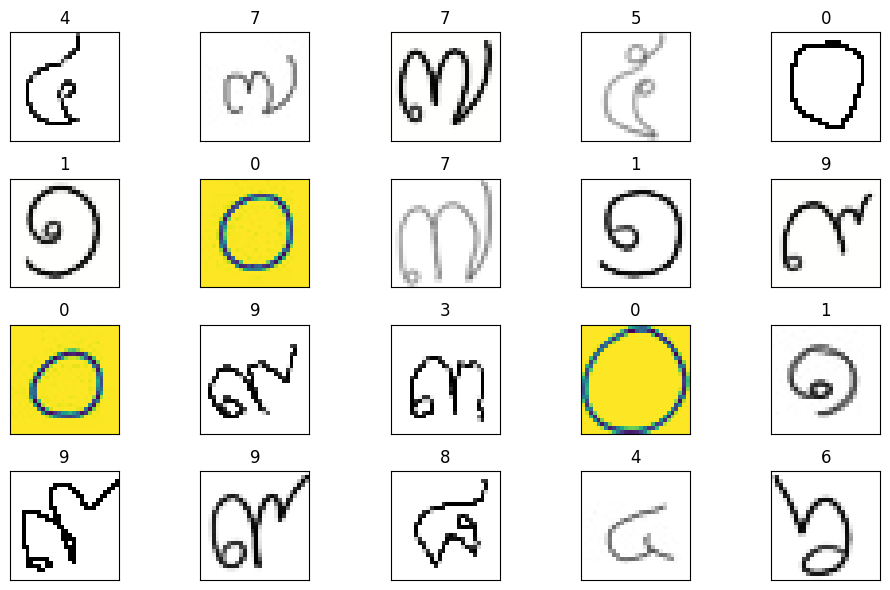

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,6), subplot_kw = {'xticks':[],'yticks':[]} )

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

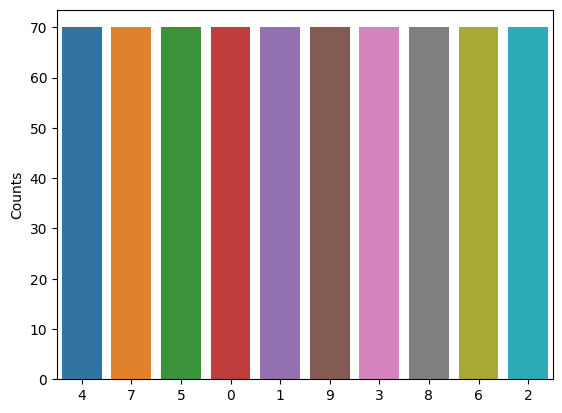

In [11]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.ylabel('Counts')

Prepare for Training

In [12]:
# Prepare X and Y

Before_x = data['Filepath']
y = data['Label']

# To work with X, we need to flatten the images first.
read_x = []

for i in Before_x :
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = rescale(img)
    img = cv2.resize(img, (28, 28))
    img = img.flatten()
 
    read_x.append(img)

x = np.asarray(read_x)

In [13]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [14]:
df = pd.concat([x,y] , axis=1)
#df.to_csv('image_df.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,255,255,255,255,255,255,255,255,255,255,...,0,0,4,12,76,195,255,255,255,4
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,252,254,255,255,7
2,255,255,255,255,255,255,255,255,255,255,...,244,255,255,255,255,255,255,255,255,7
3,255,255,255,255,255,255,255,255,255,255,...,236,221,207,214,234,246,255,255,255,5
4,255,255,255,255,255,255,255,255,255,255,...,0,105,255,255,255,255,255,255,255,0


In [15]:
# Binarize the output

#y = preprocessing.label_binarize( y , classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
#print(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state = 42, stratify = y )

# STEP 3 : Train 

<h4>Cross Validation : AutoML </h4>
By : Pycaret

In [17]:
from pycaret.classification import *

s = setup( df, target = 'Label', session_id = 123, train_size = 0.7  )

,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
4,Original data shape,"(700, 785)"
5,Transformed data shape,"(700, 785)"
6,Transformed train set shape,"(489, 785)"
7,Transformed test set shape,"(211, 785)"
8,Numeric features,784
9,Preprocess,True


In [18]:
best = s.compare_models( sort = 'Accuracy', fold = 5, n_select = 3 )
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9693,0.9984,0.9693,0.9710,0.9690,0.9659,0.9662,2.466
rf,Random Forest Classifier,0.9550,0.9979,0.9550,0.9593,0.9547,0.9500,0.9506,2.372
lr,Logistic Regression,0.9488,0.9957,0.9488,0.9539,0.9486,0.9431,0.9438,3.100
lightgbm,Light Gradient Boosting Machine,0.9305,0.9976,0.9305,0.9358,0.9303,0.9228,0.9234,3.900
svm,SVM - Linear Kernel,0.9058,0.0000,0.9058,0.9191,0.9008,0.8954,0.8976,2.168
knn,K Neighbors Classifier,0.8998,0.9866,0.8998,0.9089,0.8990,0.8886,0.8898,2.636
gbc,Gradient Boosting Classifier,0.8590,0.9880,0.8590,0.8789,0.8611,0.8433,0.8451,14.310
lda,Linear Discriminant Analysis,0.8343,0.9706,0.8343,0.8407,0.8336,0.8158,0.8167,2.324
dt,Decision Tree Classifier,0.7751,0.8751,0.7751,0.7935,0.7751,0.7501,0.7521,2.220
nb,Naive Bayes,0.7506,0.8825,0.7506,0.8003,0.7542,0.7230,0.7284,2.272


In [19]:
display(best)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 Logi

In [20]:
tuned_model = tune_model( best[0], optimize = 'Accuracy', n_iter = 30, fold = 5 )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:27:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9969,0.9286,0.9378,0.9272,0.9206,0.9222
1,0.9388,0.9957,0.9388,0.9456,0.9394,0.9320,0.9327
2,0.9490,0.9964,0.9490,0.9476,0.9479,0.9433,0.9434
3,0.9388,0.9957,0.9388,0.9391,0.9375,0.9320,0.9323
4,0.9794,0.9985,0.9794,0.9831,0.9791,0.9771,0.9775
Mean,0.9469,0.9966,0.9469,0.9507,0.9462,0.9410,0.9416
Std,0.0175,0.0010,0.0175,0.0167,0.0177,0.0194,0.0192


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


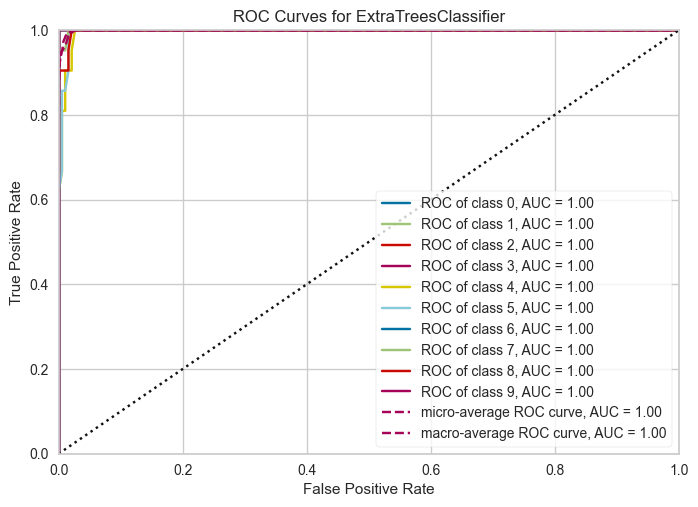

In [21]:
plot_model(tuned_model, plot = 'auc')

<h4>Pipeline</h4>

In [22]:
steps = [
    ('scalar', MinMaxScaler()),
    ('ExtraTreesClassifier',ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False))
]

pipeline = Pipeline(steps)

In [23]:
pr = pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))

Training score: 1.0


# STEP 4 : Test

In [24]:
y_pred = pr.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.98        21
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        21
           4       0.85      0.81      0.83        21
           5       0.86      0.90      0.88        21
           6       0.95      1.00      0.98        21
           7       1.00      0.95      0.98        21
           8       0.91      0.95      0.93        21
           9       1.00      1.00      1.00        21

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



<h4>Evaluations</h4>